In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('hygdata_v3.csv')
df.head()

id  hip        hd  hr   gl   bf proper        ra        dec      dist  ...  \
0   0  NaN       NaN NaN  NaN  NaN    Sol  0.000000   0.000000    0.0000  ...   
1   1  1.0  224700.0 NaN  NaN  NaN    NaN  0.000060   1.089009  219.7802  ...   
2   2  2.0  224690.0 NaN  NaN  NaN    NaN  0.000283 -19.498840   47.9616  ...   
3   3  3.0  224699.0 NaN  NaN  NaN    NaN  0.000335  38.859279  442.4779  ...   
4   4  4.0  224707.0 NaN  NaN  NaN    NaN  0.000569 -51.893546  134.2282  ...   

   bayer  flam  con  comp  comp_primary base         lum  var  var_min  \
0    NaN   NaN  NaN     1             0  NaN    1.000000  NaN      NaN   
1    NaN   NaN  Psc     1             1  NaN    9.638290  NaN      NaN   
2    NaN   NaN  Cet     1             2  NaN    0.392283  NaN      NaN   
3    NaN   NaN  And     1             3  NaN  386.901132  NaN      NaN   
4    NaN   NaN  Phe     1             4  NaN    9.366989  NaN      NaN   

   var_max  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 37 columns]

In [5]:
# Preprocessing

from sklearn import preprocessing
pre = df[['hd','dist','mag','absmag','lum','spect']].dropna()
nan_value = float("NaN")
pre.replace("", nan_value, inplace=True)
pre.dropna(inplace=True)
#X = pre[['dist','mag','absmag','lum']]
#X = pre[['mag','absmag','lum']]
#X = pre[['absmag','lum']]
X = pre[['mag','absmag']]
Y = pre[['spect']]


spect
1            F5
2           K3V
3            B9
4           F0V
5         G8III
...         ...
119443     K3 V
119499     G3 V
119526       F8
119546  A3 (IV)
119551   K3 V J

[98824 rows x 1 columns]

In [34]:
# splitting training and test set

from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

print(X_trainset.shape,Y_trainset.shape,X_testset.shape, Y_testset.shape)

(69176, 2) (69176, 1) (29648, 2) (29648, 1)


In [40]:
# specifying the type of classifier

spectree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
spectree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
# fitting the training data
spectree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
# predicting using the test data
predTree = spectree.predict(X_testset)
print(predTree[0:20])
print(Y_testset[0:20])

['K0' 'F5' 'K0' 'K0' 'K0' 'G0' 'G0' 'K0' 'K3III' 'K0' 'G0' 'K0' 'K0' 'K0'
 'F5' 'K0' 'K3III' 'G0' 'K0' 'K0']
            spect
27679   Ap EuCrSr
103481         F8
4043         M...
61832    B8/B9III
66367       B9.5V
97293         F6V
113788         F8
27317          A2
59134       K2III
49841    K0/K1III
54726          F8
104772      K0III
43818          K2
76556          K2
70386          F8
28532      A7IV/V
34297      K0III:
21846          F8
110987         A5
6729           F0


In [43]:
# determining accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.0941378845116028


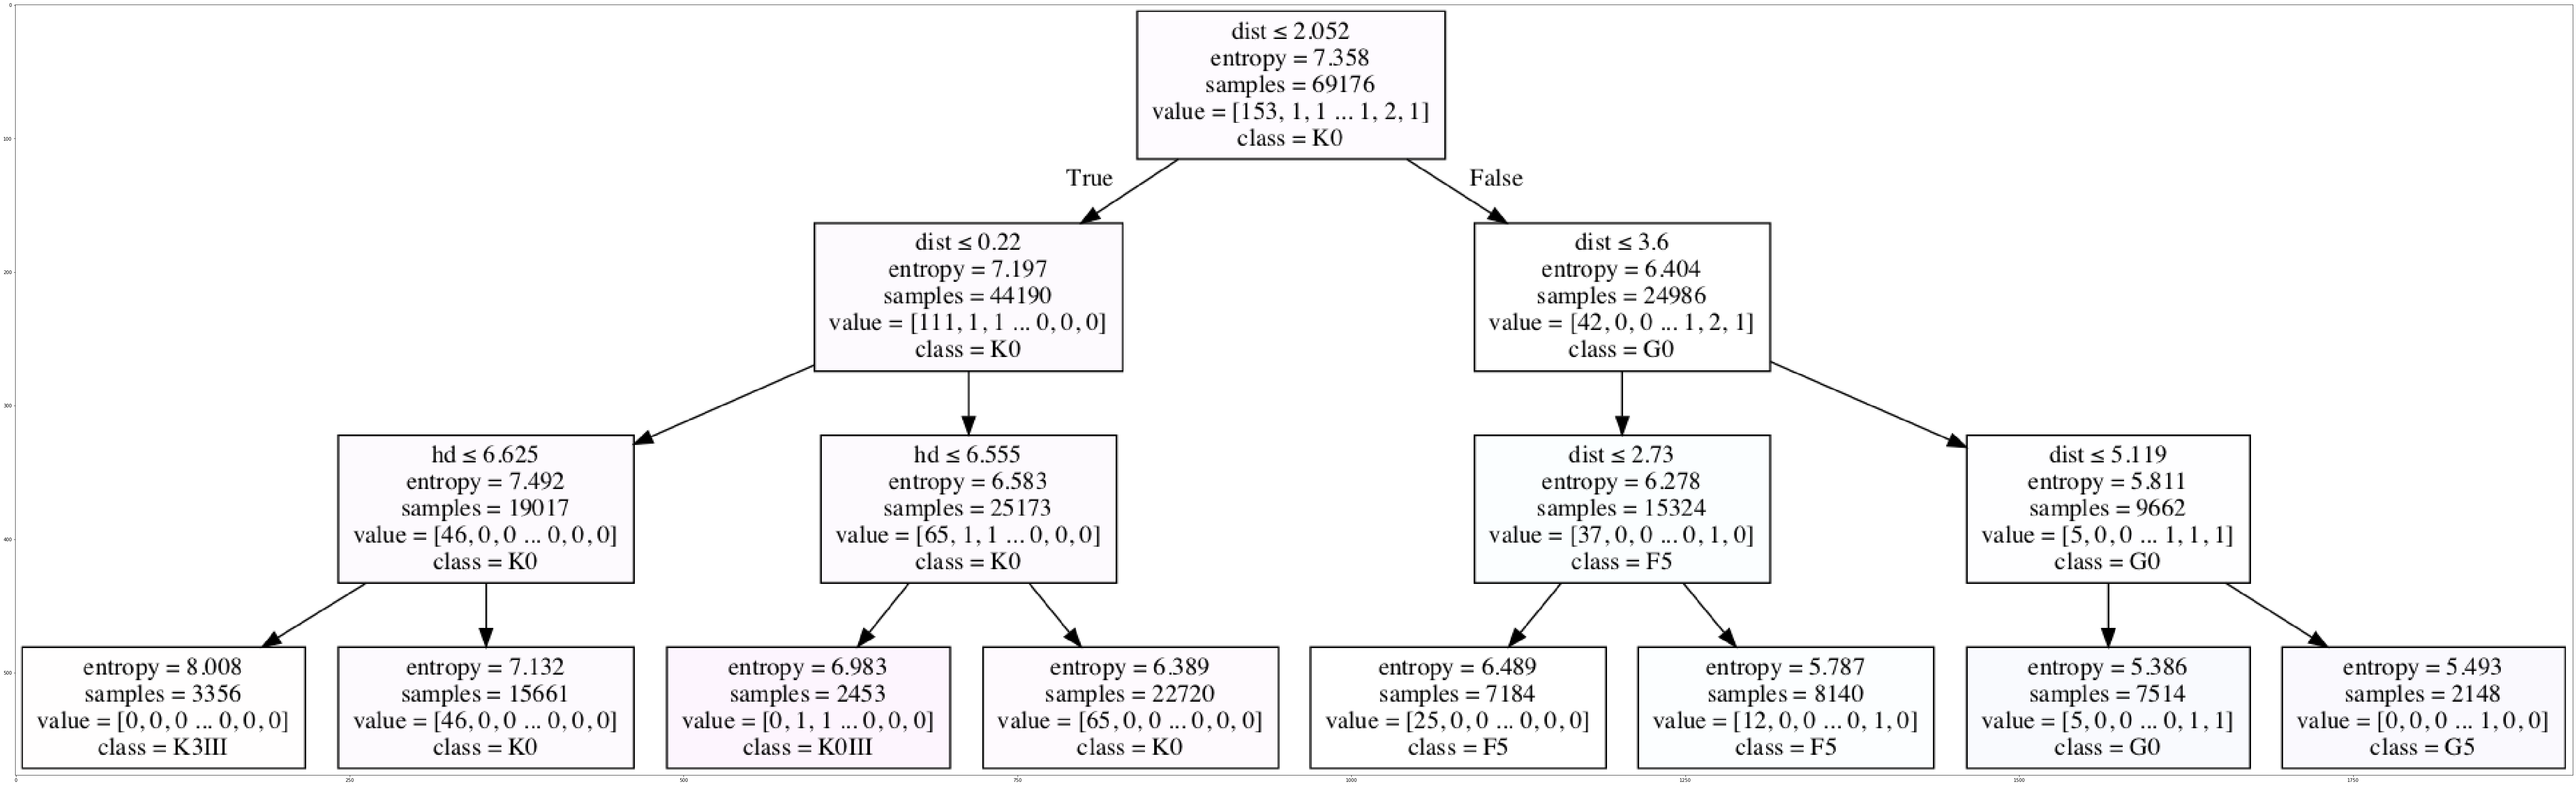

In [44]:
# plotting the decision tree 
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

%matplotlib inline 
dot_data = StringIO()
filename = "spectree.png"
featureNames = pre.columns[0:2]
targetNames = pre["spect"].unique().tolist()
out=tree.export_graphviz(spectree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')